# 22 时间序列基本概念
## 22.1 认识时间序列
- 横截面数据
- 时间序列数据
- 面板数据

## 22.2 python 中的时间序列数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Index = pd.read_csv('./022/TRD_Index.txt', sep='\t', index_col='Trddt')
SHindex = Index[Index.Indexcd==1]

In [3]:
SHindex.head()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014/1/2,1,4,2112.126,2113.110,2101.016,2109.387,-0.003115
2014/1/3,1,5,2101.542,2102.167,2075.899,2083.136,-0.012445
2014/1/6,1,1,2078.684,2078.684,2034.006,2045.709,-0.017967
2014/1/7,1,2,2034.224,2052.279,2029.246,2047.317,0.000786
2014/1/8,1,3,2047.256,2062.952,2037.110,2044.340,-0.001454


In [4]:
Clsindex = SHindex.Clsindex
Clsindex.head()

Trddt
2014/1/2    2109.387
2014/1/3    2083.136
2014/1/6    2045.709
2014/1/7    2047.317
2014/1/8    2044.340
Name: Clsindex, dtype: float64

In [5]:
Clsindex.index = pd.to_datetime(Clsindex.index)
Clsindex.head()

Trddt
2014-01-02    2109.387
2014-01-03    2083.136
2014-01-06    2045.709
2014-01-07    2047.317
2014-01-08    2044.340
Name: Clsindex, dtype: float64

<AxesSubplot:xlabel='Trddt'>

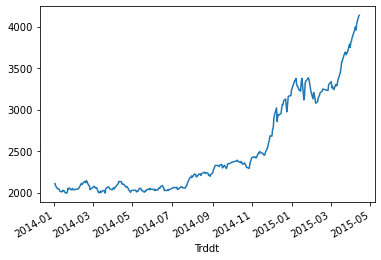

In [6]:
Clsindex.plot()

## 22.3 选取特定日期的时间序列数据

In [7]:
# 筛选某一段时间内的数据
SHindex.index = pd.to_datetime(SHindex.index)
SHindex.loc['2014-10-08':'2014-11-01'].head()
# 筛选某一特定年份的数据
SHindex.loc['2015'].head()
# 选取某个时间点之前或之后的数据
SHindex.loc[:'2014-12-31'].tail()
SHindex.loc['2015':].head()
# 选取某一年中某几个月的数据
SHindex.loc['2014-9': '2014'].tail()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014-12-25,1,4,2992.462,3073.345,2969.874,3072.536,0.033643
2014-12-26,1,5,3078.005,3164.155,3064.176,3157.603,0.027686
2014-12-29,1,1,3212.559,3223.860,3126.944,3168.016,0.003298
2014-12-30,1,2,3160.801,3190.299,3130.353,3165.815,-0.000695
2014-12-31,1,3,3172.597,3239.357,3157.259,3234.677,0.021752


## 22.4 时间序列数据描述性统计

<AxesSubplot:>

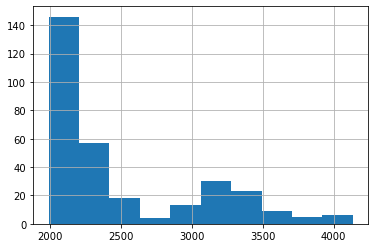

In [8]:
# 直方图
Clsindex.hist()

In [9]:
Clsindex.describe()

count     311.000000
mean     2490.001161
std       563.700980
min      1991.253000
25%      2052.140500
50%      2224.654000
75%      2996.395000
max      4135.565000
Name: Clsindex, dtype: float64

# 23 时间序列的基本性质
## 23.1 自相关性
### 23.1.1 自协方差
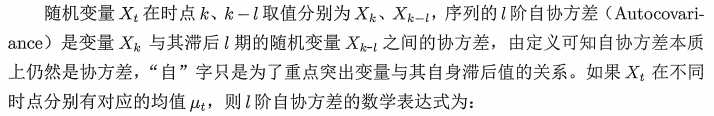
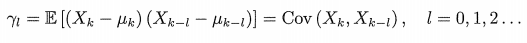x
### 23.1.2 自相关系数
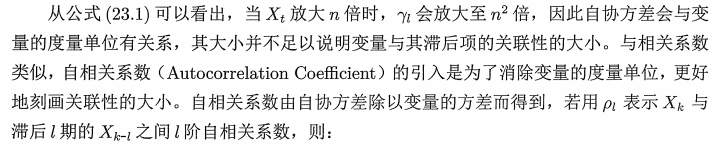
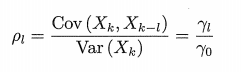
### 23.1.3 偏自相关系数
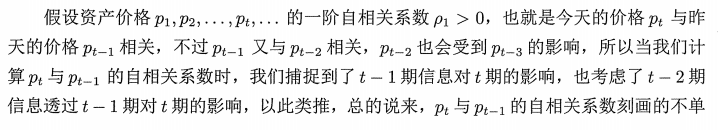
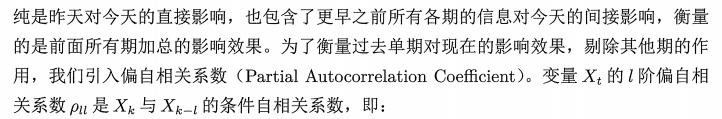
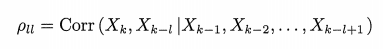
### 23.1.4 acf() 函数与 pacf() 函数
- acf() statsmodels 包中计算时间序列的自相关系数
- pacf() statsmodels 包中计算偏自相关系数

### 23.1.5 上证综指的收益率指数的自相关性判断

In [10]:
from statsmodels.tsa import stattools
data = pd.read_csv('./023/TRD_Index.txt', sep='\t', index_col='Trddt', parse_dates=['Trddt'])
data.head()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014-01-02,1,4,2112.126,2113.110,2101.016,2109.387,-0.003115
2014-01-03,1,5,2101.542,2102.167,2075.899,2083.136,-0.012445
2014-01-06,1,1,2078.684,2078.684,2034.006,2045.709,-0.017967
2014-01-07,1,2,2034.224,2052.279,2029.246,2047.317,0.000786
2014-01-08,1,3,2047.256,2062.952,2037.110,2044.340,-0.001454


In [11]:
# 上证综指数据
SHindex = data[data.Indexcd == 1]
SHRet = SHindex.Retindex
SHRet.head()

Trddt
2014-01-02   -0.003115
2014-01-03   -0.012445
2014-01-06   -0.017967
2014-01-07    0.000786
2014-01-08   -0.001454
Name: Retindex, dtype: float64

In [12]:
# 计算相关系数
acfs = stattools.acf(SHRet)
acfs

array([ 1.        ,  0.03527714, -0.01178861, -0.02953388,  0.16043181,
       -0.0506902 , -0.00557277,  0.02556123,  0.01763209,  0.01170585,
        0.05137502, -0.03961812,  0.00219185,  0.06976089,  0.07020657,
       -0.0165844 ,  0.09777829,  0.10084446,  0.04706095, -0.05291647,
        0.08159786, -0.04505366,  0.04894213, -0.11532665,  0.04273513])

In [13]:
pacfs = stattools.pacf(SHRet)
pacfs

array([ 1.        ,  0.03539094, -0.01313388, -0.02897258,  0.16483494,
       -0.06656327,  0.00233848,  0.03690183, -0.01674841,  0.03307673,
        0.05240115, -0.05902877,  0.01423995,  0.07184167,  0.04734467,
        0.00131723,  0.10809391,  0.07778589,  0.03637376, -0.04041105,
        0.06533274, -0.07473672,  0.05527639, -0.1271887 ,  0.02235463])

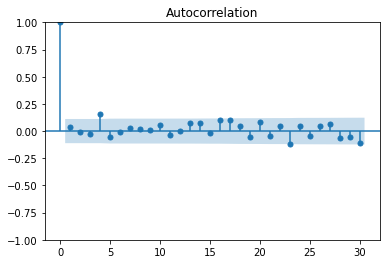

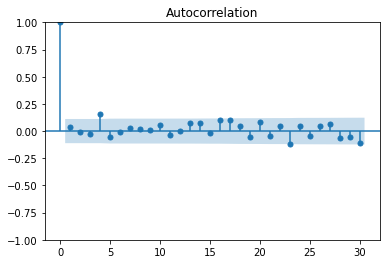

In [14]:
# 绘制自相关系数图
from statsmodels.graphics.tsaplots import *
plot_acf(SHRet, use_vlines=True, lags=30)

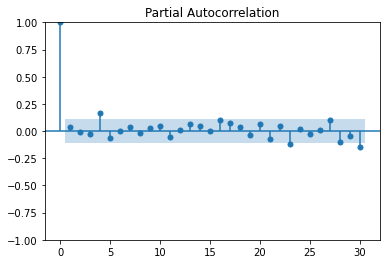

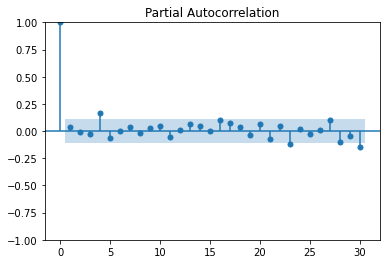

In [15]:
plot_pacf(SHRet, use_vlines=True, lags=30)

## 23.2 平稳性
- 平稳：时间序列的基本特性维持不变
- 非平稳：时间序列的基本特性只存在于所发生的日期，并不会延续到未来

### 23.2.1 强平稳
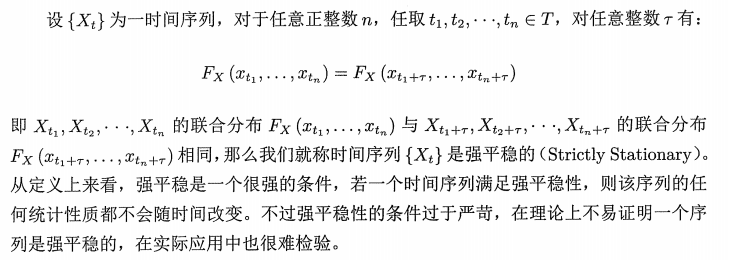
### 23.2.2 弱平稳
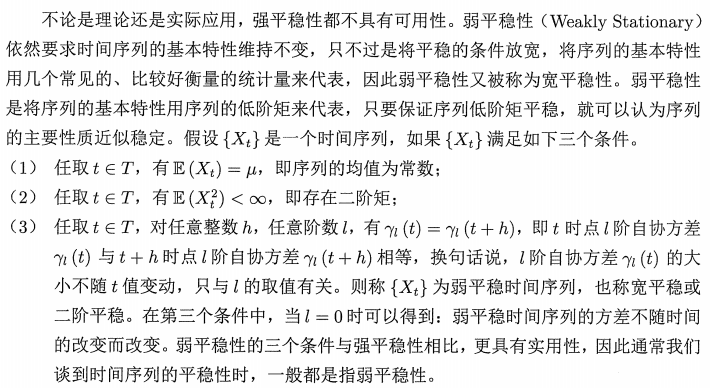
### 23.2.3 强平稳和弱平稳的区别
- 弱平稳不一定是强平稳
- 强平稳也不一定是弱平稳
- 服从正太分布的弱平稳序列也是强平稳的
- 一般情况下，序列的一阶矩和二阶矩存在时，强平稳序列一定是弱平稳的

## 23.3 上证综指的平稳性校验
### 23.3.1 观察时间序列图
- 数据的时序图围绕一个水平线上下以大致相同的幅度波动，可能具有弱平稳性
- 如果时序图有着明显递增、递减的趋势或周期性波动的形态，很有可能是非平稳的

<AxesSubplot:xlabel='Trddt'>

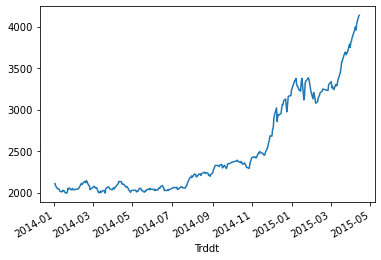

In [16]:
SHclose = SHindex.Clsindex
SHclose.plot()

<AxesSubplot:xlabel='Trddt'>

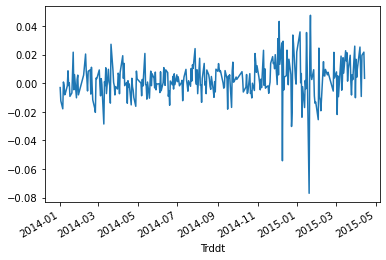

In [17]:
SHRet.plot()

### 23.3.2 观察序列的自相关图和偏自相关图
- 对于平稳性时间序列，其自相关系数或者偏自相关系数大都快速减小至0附件或者在某一阶段后变为0
- 非平稳序列，其自相关系数多数会呈现缓慢下降的趋势，而不是快速减小

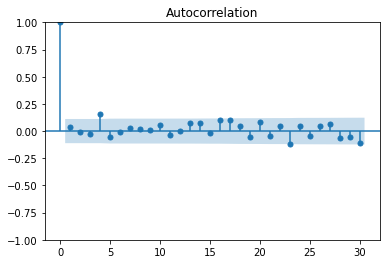

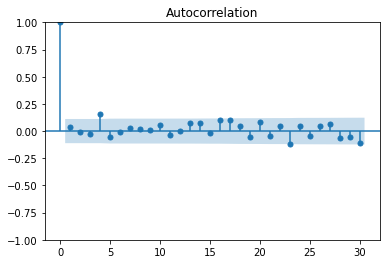

In [18]:
plot_acf(SHRet, use_vlines=True, lags=30)

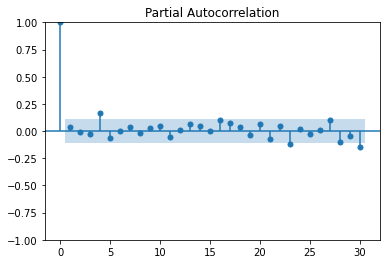

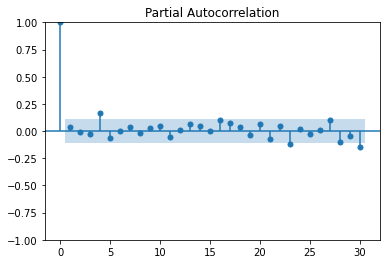

In [19]:
plot_pacf(SHRet, use_vlines=True, lags=30)

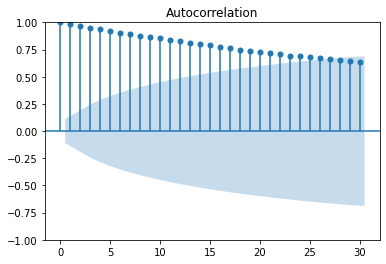

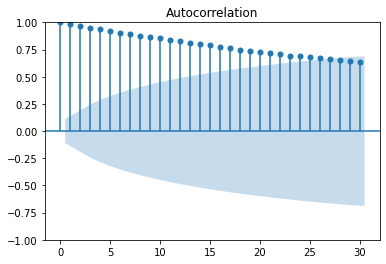

In [20]:
plot_acf(SHclose, use_vlines=True, lags=30)

### 23.3.3 单位根检验
- 非平稳时间序列的性质
    - 序列是非平稳的，经过 d 次差分可以将其转换成平稳序列，则称此序列为 I(d)，I指整合，d 为整合阶数 ，如：
    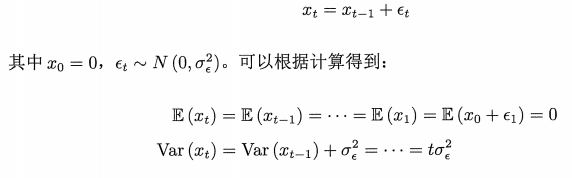
    - xt 的方差会随时间 t 发生改变，是非平稳的，但经过一阶差分后，Δxt = xt - xt-1 = ϵt为平稳的时间序列
- 时间序列是否平稳可借助滞后算子多项式方程的根来判断
    - 滞后算子：将一个时间序列的前一期值转化为当期值得算子，用 L 表示。
    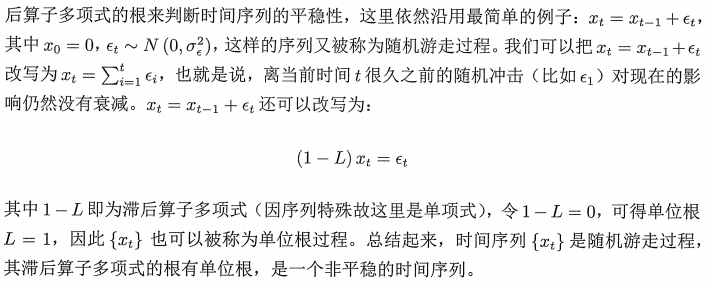
    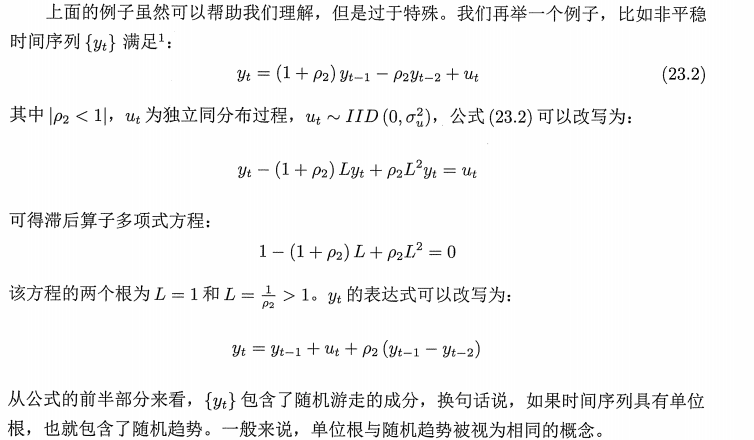
    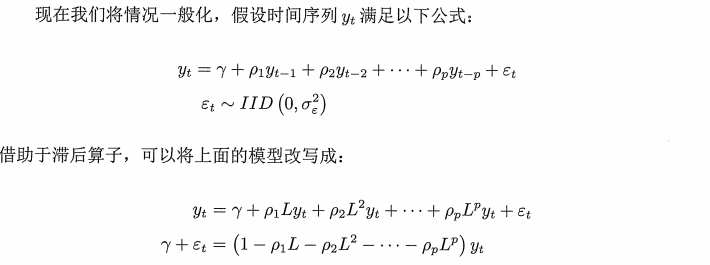
    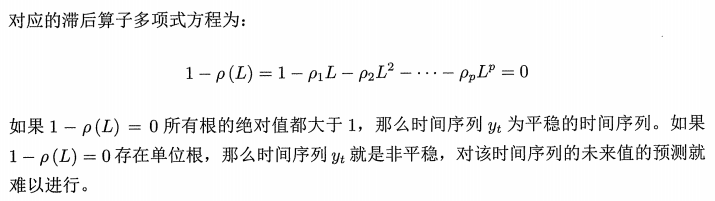
- 单位根检验方法
    - DF 检验
    - ADF 检验
    - PP 检验
- ADF 检验
    - ADF 检验得模型
    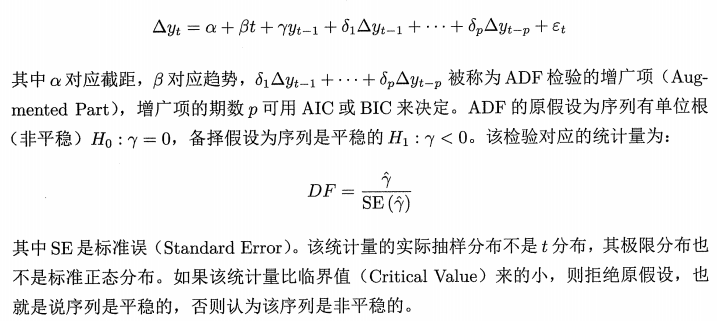
    - python 中使用 arch 包中 ADF 函数进行ADF单位根检验
  

In [21]:
from arch.unitroot import ADF

In [22]:
adfSHRet = ADF(SHRet)

In [23]:
print(adfSHRet.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.559
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [24]:
adfSHclose = ADF(SHclose)
print(adfSHclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  2.549
P-value                         0.999
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 23.4 白噪声
### 23.4.1 白噪声
- 白噪声过程
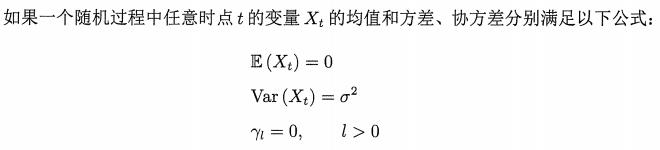 
    
    - 白噪声过程中各期变量之间得协方差为0， 白噪声过程是没有相关性的
    - 纯随机序列
    - 白噪声序列一定是平稳的时间序列
- 高斯白噪声过程
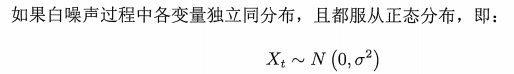

    - 强平稳的时间序列

Text(0.5, 1.0, 'white noise')

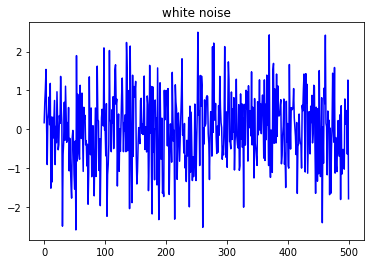

In [25]:
# 生成纯随机序列
whiteNoise = np.random.standard_normal(size=500)
plt.plot(whiteNoise, c='b')
plt.title('white noise')

### 23.4.2 白噪声检验 - Ljung-Box 检验
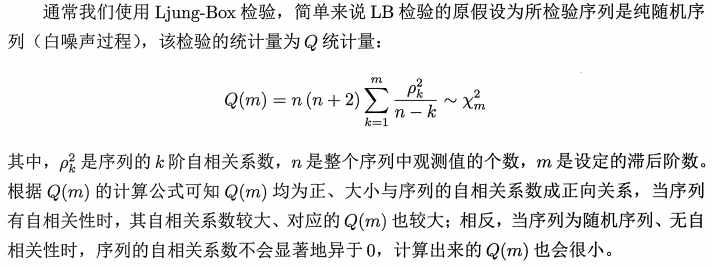
- LB 检验过程在 python 中可以调用 statsmodels 包中的q_stat()函数实现。
- 该函数会对每一阶进行LB检验，而不仅仅是对所有的自相关系数进行LB检验
### 23.4.3 上证综合指数的白噪声检验

In [26]:
lb1 = stattools.q_stat(stattools.acf(SHRet)[1:13], len(SHRet))
lb1

(array([ 0.39077768,  0.43455722,  0.7102307 ,  8.87130492,  9.68869854,
         9.69861023,  9.90782614, 10.00770409, 10.05187169, 10.90544768,
        11.41474472, 11.41630878]),
 array([0.53189091, 0.80470574, 0.87079499, 0.06439799, 0.08455194,
        0.13793151, 0.19385734, 0.26448561, 0.34630225, 0.36493184,
        0.40919934, 0.4936175 ]))

In [27]:
lb1[1][-1]

0.49361749645029296

In [28]:
lb2 = stattools.q_stat(stattools.acf(SHclose)[1:13], len(SHclose))
lb2[1][-1]

0.0

# 24 时间序列预测
## 24.1 移动平均预测
### 24.1.1 简单移动平均
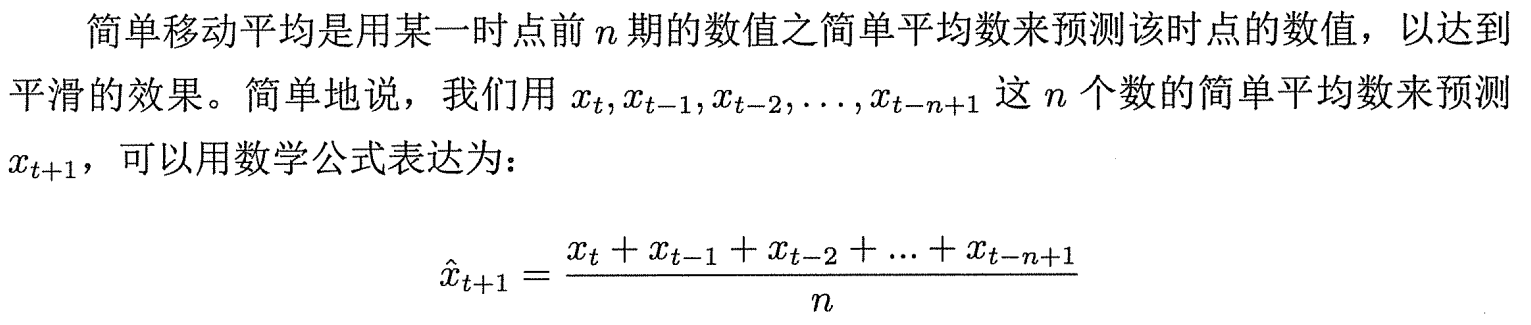
### 24.1.2 加权移动平均
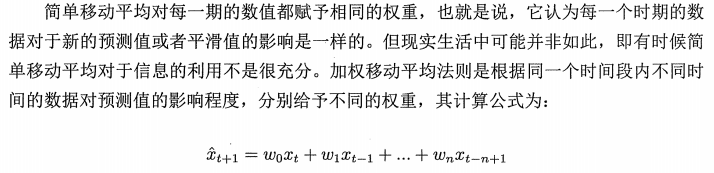
### 24.1.3 指数加权移动平均
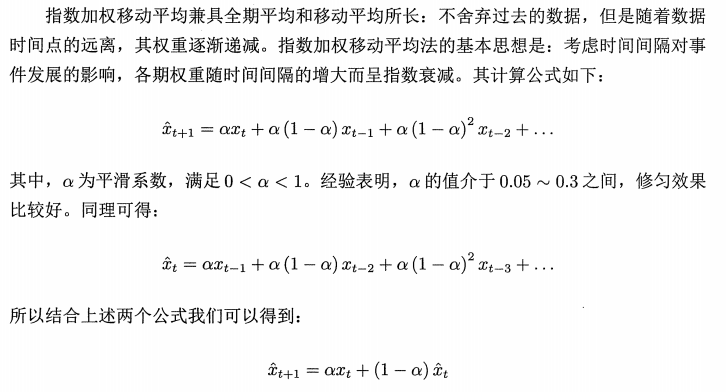

## 24.2 ARMA 模型预测
- AR 模型、MA 模型、ARMA 模型 处理平稳的时间序列，假设干扰项方差不变
- ARIMA 模型 处理对象为非平稳时间序列，假设干扰项方差固定不变
- ARCH 模型、GARCH 模型允许方差变动，解决了金融资产收益率序列波动聚集的难题
- 协整理论，将时间序列分析对象扩展到多变量场景

### 24.2.1 自回归模型
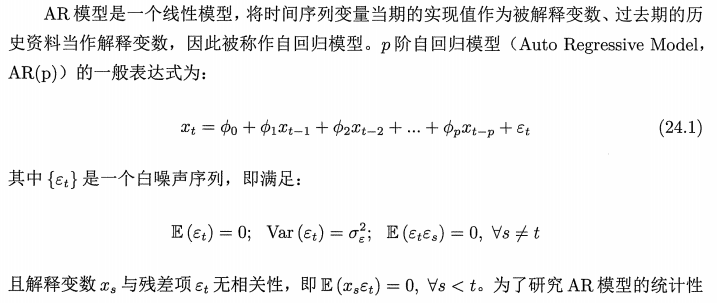
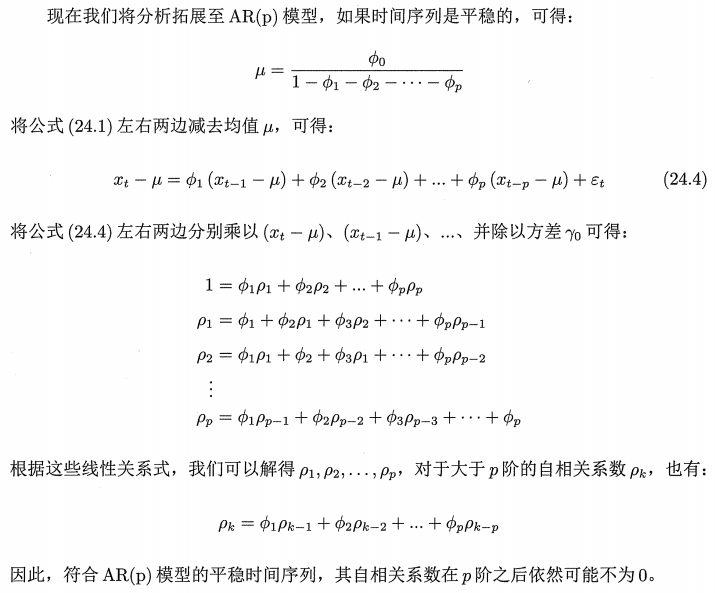
### 24.2.2 移动平均模型
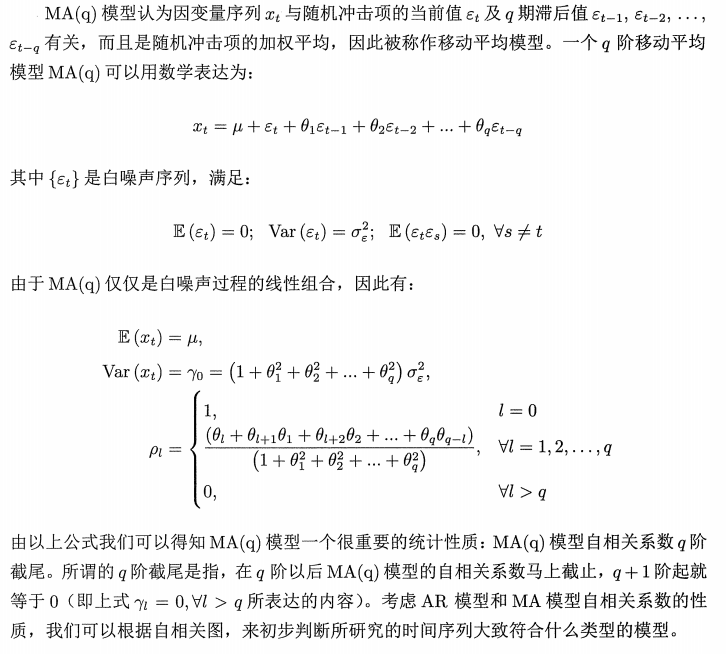

## 24.3 自回归移动平均模型
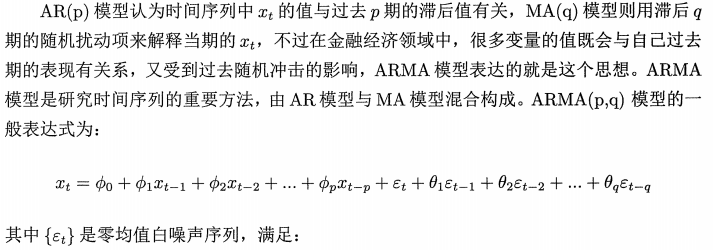
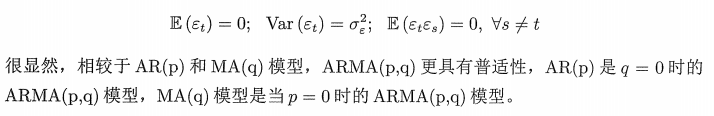

## 24.4 ARNA 模型的建模过程
- 序列识别
    - 是否为平稳序列，非平稳序列需对其进行变换处理，成为平稳序列
    - 是否为白噪声序列，白噪声过程无法构建 ARMA 模型
- 模型识别与估计
    - 决定 p 和 q 的值，选出相对最优的模型结构。
    - 通过时间序列的自相关函数 ACF 和偏自相关函数大致决定
    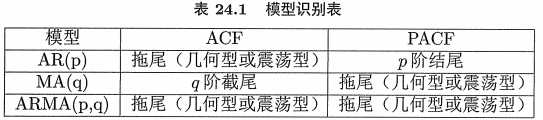
- 模型诊断
     - 对模型残差进行校验，确保其为服从正态分布的白噪声序列

## 24.5 CPI 数据的ARMA短期预测
### 24.5.1 序列识别

In [29]:
# 读取数据
CPI = pd.read_csv('./024/CPI.csv', index_col='time', parse_dates=['time'])
CPI.head()

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5
2014-02-01,100.5
2014-01-01,101.0


In [30]:
CPI.tail(3)

,CPI
time,
2001-03-01,99.4
2001-02-01,100.2
2001-01-01,101.9


In [31]:
CPI.shape

(161, 1)

In [32]:
# 剔除最后3期数据，构造用于建模的数据子集
CPItrain = CPI.iloc[3:]
CPItrain.head(3)

,CPI
time,
2014-02-01,100.5
2014-01-01,101.0
2013-12-01,100.3


<AxesSubplot:title={'center':'CPI 2001-2014'}, xlabel='time'>

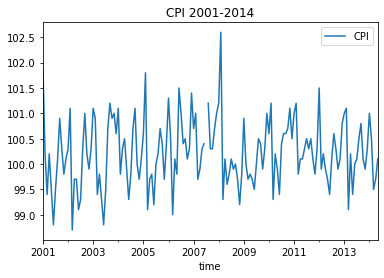

In [33]:
# 绘制时序图，直观了解数据情况
CPI.sort_index().plot(title='CPI 2001-2014')

In [34]:
# 进行 ADF 单位根校验， 最大滞后阶数设为10
CPItrain = CPItrain.dropna().CPI
print(ADF(CPItrain, max_lags=10).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.900
P-value                         0.045
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [35]:
# 检验是否为白噪声序列
LjungBox = stattools.q_stat(stattools.acf(CPItrain)[1:12], len(CPItrain))
LjungBox[1][-1]

0.0005560128948515392

## 24.5.2 模型识别与估计

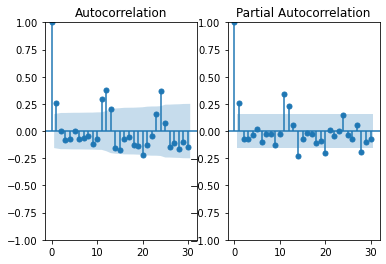

In [36]:
# 绘制除序列的自相关系数图和偏自相关系数图
axe1 = plt.subplot(1, 2, 1)
axe2 = plt.subplot(1, 2 ,2)
plot1 = plot_acf(CPItrain, lags=30, ax=axe1)
plot2 = plot_pacf(CPItrain, lags=30, ax=axe2)

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(CPItrain, order=(1,0,1)).fit()
model1.summary()
# import statsmodels.api as sm
# model = sm.tsa.ARIMA(CPItrain, order=(1, 0, 1)).fit()
# model.summary()
# model.sigma2

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so w

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  157
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -150.339
Date:                Mon, 29 May 2023   AIC                            308.678
Time:                        07:48:26   BIC                            320.903
Sample:                             0   HQIC                           313.643
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2373      0.077   1298.193      0.000     100.086     100.389
ar.L1          0.0935      0.328      0.285      0.775      -0.549       0.736
ma.L1          0.1931      0.325      0.594      0.552      -0.444       0.830
sigma2         0.3972      0.040     10.022      0.000       0.320       0.475
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.36
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.72
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
model2 = ARIMA(CPItrain, order=(1,0,2)).fit()
model2.summary()

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so w

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  157
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -149.185
Date:                Mon, 29 May 2023   AIC                            308.370
Time:                        07:48:26   BIC                            323.651
Sample:                             0   HQIC                           314.576
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2487      0.037   2719.624      0.000     100.176     100.321
ar.L1          0.9475      0.065     14.480      0.000       0.819       1.076
ma.L1         -0.7029     18.759     -0.037      0.970     -37.470      36.064
ma.L2         -0.2970      5.537     -0.054      0.957     -11.149      10.555
sigma2         0.3874      7.248      0.053      0.957     -13.818      14.592
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                16.74
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             0.59
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model3 = ARIMA(CPItrain, order=(2,0,1)).fit()
model4 = ARIMA(CPItrain, order=(2,0,2)).fit()
model5 = ARIMA(CPItrain, order=(3,0,1)).fit()
model6 = ARIMA(CPItrain, order=(3,0,2)).fit()
model7 = ARIMA(CPItrain, order=(3,0,3)).fit()

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so w

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  157
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -149.482
Date:                Mon, 29 May 2023   AIC                            312.964
Time:                        07:48:27   BIC                            334.358
Sample:                             0   HQIC                           321.653
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2352      0.062   1624.304      0.000     100.114     100.356
ar.L1          0.7336      5.964      0.123      0.902     -10.956      12.423
ar.L2         -0.0600      5.897     -0.010      0.992     -11.618      11.498
ar.L3         -0.0741      1.627     -0.046      0.964      -3.263       3.115
ma.L1         -0.4513      5.962     -0.076      0.940     -12.136      11.234
ma.L2         -0.1313      4.228     -0.031      0.975      -8.417       8.155
sigma2         0.3928      0.043      9.144      0.000       0.309       0.477
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                             0.62
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 24.5.3 模型诊断

In [41]:
# conf_int() 计算模型中的系数的置信区间，
# 所有系数的置信区间都不含0，在5%的置信水平下，所有系数都是显著的
model6.conf_int()

,0,1
const,100.114222,100.356120
ar.L1,-10.955877,12.423170
ar.L2,-11.617909,11.497957
ar.L3,-3.263305,3.115194
ma.L1,-12.136373,11.233844
ma.L2,-8.417283,8.154749
sigma2,0.308616,0.477008


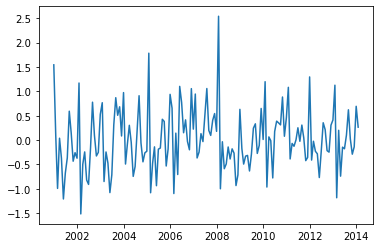

In [42]:
# 残差序列的纯随机性检验
import math
# 绘制时间序列模拟的诊断图
resid = model6.resid
plt.plot(resid)

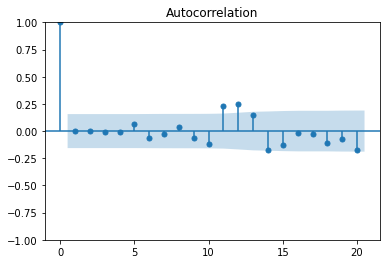

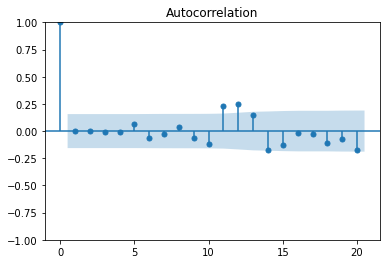

In [43]:
plot_acf(resid, lags=20)

In [44]:
LjungBox = stattools.q_stat(stattools.acf(resid)[1:13], len(resid))
LjungBox[1][-1]

0.018282269200063494

In [45]:
LjungBox = stattools.q_stat(stattools.acf(resid)[1:20], len(resid))
LjungBox[1][-1]

0.003460901185304412

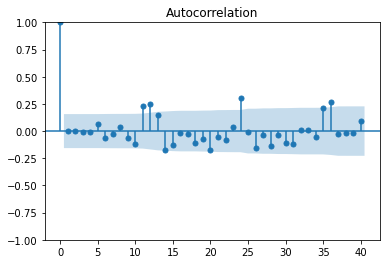

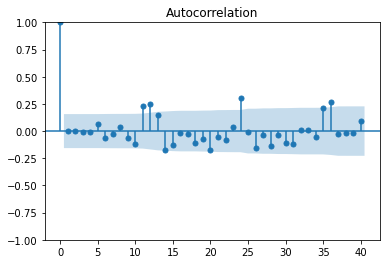

In [46]:
plot_acf(resid, lags=40)

### 24.4.5 运用模型进行预测

In [47]:
model6.forecast(3)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


157    100.813782
158    100.359841
159    100.168642
Name: predicted_mean, dtype: float64

In [48]:
CPI.head(3)

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5


## 24.6 股票收益率的平稳时间序列建模

In [49]:
# 读取数据
Datang = pd.read_csv('./024/Datang.csv', index_col='time', parse_dates=['time'])
Datang.head()

,datang
time,
2008-01-02,0.0000
2008-01-03,2.2152
2008-01-04,0.1548
2008-01-07,1.8547
2008-01-08,-0.1517


In [50]:
returns = Datang.datang.loc['2014-01-01': '2016-01-01']
returns.head(3)

time
2014-01-29   -1.3388
2014-03-03   -1.9717
2014-03-04    7.1171
Name: datang, dtype: float64

In [51]:
# 检验序列的平稳性
ADF(returns).summary()

Test Statistic,-18.288
P-value,0.000
Lags,0


In [52]:
# 序列是否为白噪声
stattools.q_stat(stattools.acf(returns)[1:12], len(returns))[1]

array([0.00203329, 0.00734689, 0.01341783, 0.01713763, 0.02968939,
       0.04376739, 0.0415143 , 0.008257  , 0.01109367, 0.00375598,
       0.00635125])

In [53]:
# arima 建模
# max_ma 参数用于指定最大的 ma 滞后阶数
stattools.arma_order_select_ic(returns, max_ma=4)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

{'bic':              0            1            2            3            4
 0  2648.315604  2644.994668  2651.064161  2655.513505  2660.083411
 1  2644.849431  2650.947712  2655.557500  2660.385528  2666.157098
 2  2650.956398  2656.887650  2660.643967  2666.470096  2666.264378
 3  2656.355363  2660.463074  2662.226633  2664.757308  2670.784666
 4  2660.392145  2665.919454  2668.487775  2670.911811  2676.901480,
 'bic_min_order': (1, 0)}

In [55]:
# 根据上述结果，选择 ARMA(0,1) 模型
# 查看模型结果
model = ARIMA(returns, order=(1,0,0)).fit()
model.summary()

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 datang   No. Observations:                  453
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1313.251
Date:                Mon, 29 May 2023   AIC                           2632.502
Time:                        07:49:52   BIC                           2644.849
Sample:                             0   HQIC                          2637.367
                                - 453                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1419      0.243      0.585      0.559      -0.334       0.617
ar.L1          0.1448      0.032      4.506      0.000       0.082       0.208
sigma2        19.2987      1.165     16.569      0.000      17.016      21.582
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.65
Prob(Q):                              0.99   Prob(JB):                         0.16
Heteroskedasticity (H):               4.72   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# 模型诊断
model.conf_int()

,0,1
const,-0.333654,0.617359
ar.L1,0.081827,0.207829
sigma2,17.015839,21.581615


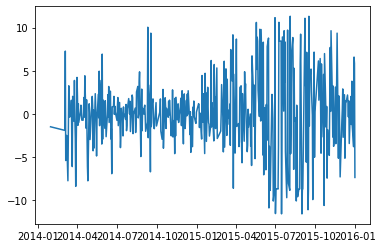

In [57]:
# 残差诊断
resid = model.resid
plt.plot(resid)

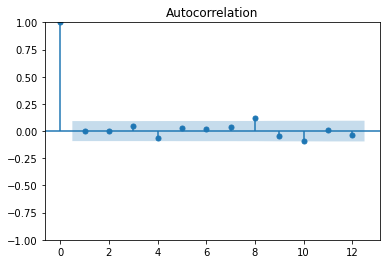

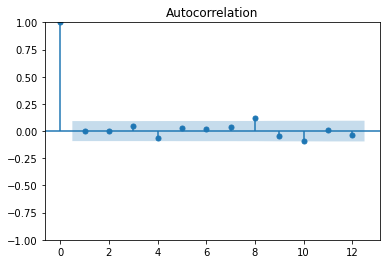

In [58]:
plot_acf(resid, lags=12)

In [60]:
# LB 校验
LjungBox = stattools.q_stat(stattools.acf(resid)[1:12], len(resid))
LjungBox[1][-1]

0.14108933110312838